<a href="https://colab.research.google.com/github/jonesavelino/idea-c2-tool/blob/main/exemplos/exemplo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Caderno de códigos-fontes utilizados na tese de Doutorado
##Aluno: Jones de Oliveira Avelino
##Instituto Militar de Engenharia
##Tese: GRAFOS DE CONHECIMENTO E SUAS RELAÇÕES: UMA APLICAÇÃO NO CONTEXTO DE C2
##Ano: 2026

Exemplo 1: Submissão de texto exemplo para representação vetorial utilizando o LLM BERT

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 2.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Entidades nomeadas reconhecidas:
  Rio de Janeiro       → LOC

📊 Matriz de confusão:
 [[1 0 0]
 [0 0 0]
 [0 1 0]]

📈 Relatório de métricas:
                   precision    recall  f1-score   support

             LOC      1.000     1.000     1.000         1
               O      0.000     0.000     0.000         0
OPERACAO_MILITAR      0.000     0.000     0.000         1

        accuracy                          0.500         2
       macro avg      0.333     0.333     0.333         2
    weighted avg      0.500     0.500     0.500         2



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

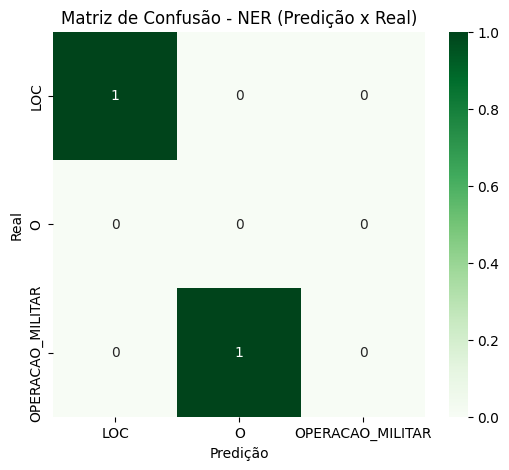

In [14]:
#instalação de bibliotecas

!pip install -U spacy
!python -m spacy download pt_core_news_lg


# importação de biblioteca
import spacy


from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Instancia o modelo em português (pt_core_news_lg) com NER
nlp = spacy.load("pt_core_news_lg")

# Entrada com o texto do exemplo
texto = "A GLO20XY ocorrerá no Rio de Janeiro"

# Instancia o objeto Doc para processar o Texto do Exemplo
doc = nlp(texto)

# Percorre o vetor com os objetos NER identificados
print("Entidades nomeadas reconhecidas:")
for ent in doc.ents:
    print(f"  {ent.text:<20} → {ent.label_}")

# Com objetivo de validar o retorno do modelo NER, eu informei os valores reais e
# armazenei no vetor entidades_reais
entidades_reais = [
    {"word": "GLO20XY", "entity": "OPERACAO_MILITAR"},
    {"word": "Rio de Janeiro", "entity": "LOC"}
]

# O vetor entidades_predicao armazena o retorno da inferência do modelo NER
entidades_predicao = {ent.text: ent.label_ for ent in doc.ents}

# Cria listas comparáveis
y_true, y_pred = [], []
for ent in entidades_reais:
    y_true.append(ent["entity"])
    y_pred.append(entidades_predicao.get(ent["word"], "O"))  # O = sem entidade

# Calcula métricas
labels = sorted(list(set(y_true + y_pred)))
cm = confusion_matrix(y_true, y_pred, labels=labels)
report = classification_report(y_true, y_pred, labels=labels, digits=3)
print("\n📊 Matriz de confusão:\n", cm)
print("\n📈 Relatório de métricas:\n", report)

# Visualização da matriz
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusão - NER (Predição x Real)")
plt.xlabel("Predição")
plt.ylabel("Real")
plt.show()

